In [27]:
import numpy as np
import mlmodel
import torch
import torch.nn as nn
import importlib
import torch
import dataloader
import pickle
import matplotlib.pyplot as plt
importlib.reload(mlmodel)
importlib.reload(dataloader)
import torch.utils.data.dataloader
device = torch.device("cuda:1")

In [2]:
options = {}
options['dim_x'] = 103
options['dim_output'] = 1
options['w0'] = 30.0
options['epochs'] = 500
options['batch_size_train'] = 96
options['learning_rate'] = 1e-5

In [3]:
groups = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100', '110', '120', '130', '140', '150']

Trainloader = []

for group in groups:
    with open('/home/rohan/Desktop/228v_project/processed_data/group_' + group + '.pkl', 'rb') as f:
        group_data = pickle.load(f)
        train_data = dataloader.EnvironmentDataset(group_data['X_val'], group_data['O_e'], group_data['V_val'], group_data['del_V'])
        train_loader = torch.utils.data.DataLoader(train_data, options['batch_size_train'], shuffle=True)
        Trainloader.append(train_loader)

In [12]:
ocr = mlmodel.OCR_NN(options)
ocr = ocr.to(device)

In [28]:
ocr_relu = mlmodel.OCR_NN_ReLu(options)
ocr_relu = ocr_relu.to(device)

In [ ]:
criteria = nn.MSELoss()
optimzer = torch.optim.Adam(ocr.parameters(), lr=options['learning_rate'])

In [29]:
criteria = nn.MSELoss()
optimzer_relu = torch.optim.Adam(ocr_relu.parameters(), lr=options['learning_rate'])

In [14]:
Loss = []

for epoch in range(options['epochs']):
    loss_epoch = 0.0
    arr = np.arange(len(Trainloader))
    np.random.shuffle(arr)

    for i in arr:
        train_loader = Trainloader[i]
        for batch in train_loader:
            X_r, O_e, V_val, del_V = batch['X_r'], batch['O_e'], batch['V_val'], batch['del_V']

            input = torch.hstack((X_r, O_e)).to(device).float()
            label_output = V_val.to(device).float()                        # [96]
            label_output = label_output.view(-1, 1)
            label_derivative_output = del_V.to(device).float()          # [96,3]

            output_V = ocr(input)                                               # [96,1]
            output_del_V = mlmodel.compute_first_derivative(ocr, input)     # [96,3]
            loss_V = torch.nn.functional.mse_loss(label_output, output_V)
            loss_del_V = torch.nn.functional.mse_loss(label_derivative_output, output_del_V)

            total_loss = loss_V + loss_del_V

            optimzer.zero_grad()
            total_loss.backward()
            optimzer.step()

            loss_epoch += total_loss.item()
    Loss.append(loss_epoch / len(train_loader))
    print(Loss[-1])


11.733857064468651
11.062522860265327
11.334885954228854
11.90696774565854
11.590608583042448
11.294951170625815
11.653152038568052
11.496398046270183
11.240190014300218
11.385313452774538
11.146559012489986
10.897159679924847
10.648936404436256
10.548009271251745
10.378573737724532
9.832853181979894
9.784214150231916
9.247121521625026
9.258509019211335
8.833410117932207
8.686523691476305
8.316055494335648
8.116923669060528
7.875454791518235
7.845033757702601
7.322064109603335
7.235551033725684
7.064162286904808
6.7100610381912915
6.586179959648414
6.261855880590691
6.165860219933521
6.099653320037314
6.071485739044303
5.9169108563912785
5.747133554569606
5.6443296409144255
5.496953207128806
5.443783476463452
5.271168771203451
5.243384931935889
5.115103376693881
5.049293355523855
5.030612358730643
5.005047172393607
4.920359395301662
4.915711047377623
4.925165139566893
4.904149073322386
4.8378725325353304
4.873508559789694
4.807903299843215
4.768844208755027
4.776324132621516
4.71356462

KeyboardInterrupt: 

In [30]:
Loss_relu = []

for epoch in range(options['epochs']):
    loss_epoch = 0.0
    arr = np.arange(len(Trainloader))
    np.random.shuffle(arr)

    for i in arr:
        train_loader = Trainloader[i]
        for batch in train_loader:
            X_r, O_e, V_val, del_V = batch['X_r'], batch['O_e'], batch['V_val'], batch['del_V']

            input = torch.hstack((X_r, O_e)).to(device).float()
            label_output = V_val.to(device).float()                        # [96]
            label_output = label_output.view(-1, 1)
            label_derivative_output = del_V.to(device).float()          # [96,3]

            output_V = ocr_relu(input)                                               # [96,1]
            output_del_V = mlmodel.compute_first_derivative(ocr_relu, input)     # [96,3]
            loss_V = torch.nn.functional.mse_loss(label_output, output_V)
            loss_del_V = torch.nn.functional.mse_loss(label_derivative_output, output_del_V)

            total_loss = loss_V + loss_del_V

            optimzer_relu.zero_grad()
            total_loss.backward()
            optimzer_relu.step()

            loss_epoch += total_loss.item()
    Loss_relu.append(loss_epoch / len(train_loader))
    print(Loss_relu[-1])

43.686610261142484
24.484836951069447
20.09773768604487
18.102188033390775
16.728629929923464
15.746210610900802
14.764353842171216
13.83298387917979
13.060844720723072
12.405389939459804
11.72995739815564
11.246599570773114
10.80555552723764
10.224155524281706
9.917066255862686
9.459693628024324
8.995013803700378
8.701529251375874
8.468776491352882
8.254688818278897
7.896086270581945
7.684375075716169
7.467494471662346
7.239400811950137
7.034358872735866
6.80072134287878
6.571980655050598
6.512291113821026
6.443181556617391
6.252739446316186
6.130748964246663
5.972517843818528
5.899426057192557
5.761519463697156
5.73823503810213
5.578330919888741
5.430598843171907
5.406056402515177
5.317239166476489
5.219306500707093
5.179945257203332
5.069873416931921
5.024822769008606
4.999454970104027
4.94092343162417
4.867431883468253
4.795780570999187
4.732429260580704
4.6905262701184816
4.649995189374206
4.563155203201305
4.6024109752870155
4.523007623337466
4.4953162768334725
4.426013090943925


KeyboardInterrupt: 

In [31]:
mlmodel.save_model(ocr_relu, 'relu', options)

In [ ]:
ocr_nn = mlmodel.load_model('try_1')

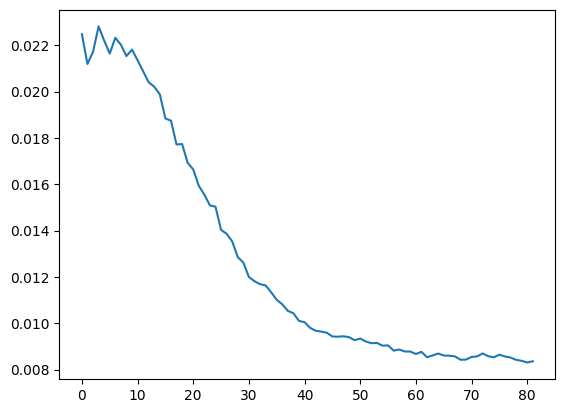

In [15]:
plt.plot(np.array(Loss)/len(train_loader))